# PBI4 Tutorial

After installation, it is sufficient to load the pbi4 library:

In [1]:
import pbi4 as pb

Next, we use the class IO to load all relevan parameters from the config file. 

In [2]:
io=pb.IO(config_file = 'config.json',verbose = True)

Let's have a look at them

In [3]:
params=io.read_params()

Input Parameters:
cat  :  sancho
box  :  1000
grid  :  128
interpolation  :  4
interlacing  :  True
kbin  :  1
kcenter  :  1
iopen  :  True
om  :  0.3
ol  :  0.7
z  :  0.5
multipoles  :  True
los  :  [0. 0. 1.]
cross  :  False
cfile  :  ../testdata/cfile.npz
npool  :  4
savedensity  :  False
config_file  :  config.json
ifile  :  ../testdata/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz
ps_outfile  :  ../testdata/ps.dat
bs_outfile  :  ../testdata/bs.dat
dk  :  0.006283185307179587
nbins_ps  :  64
nbins_bisp  :  42
kf  :  0.006283185307179587
kN  :  0.40212385965949354
Hz  :  130.86252328302402
itot  :  7714
kvec  :  [0.00628319 0.01256637 0.01884956 0.02513274 0.03141593 0.03769911
 0.0439823  0.05026548 0.05654867 0.06283185 0.06911504 0.07539822
 0.08168141 0.08796459 0.09424778 0.10053096 0.10681415 0.11309734
 0.11938052 0.12566371 0.13194689 0.13823008 0.14451326 0.15079645
 0.15707963 0.16336282 0.169646   0.17592919 0.18221237 0.18849556
 0.19477874 0.20106193 0.20734512 

Suppose you want to modify a parameter on the fly. Let's suppose we want a finer binning. 
Current width of the bin is kbin = 2, we want to change to kbin = 1 and change the center of the bin to kcenter = 1.

Here's how to do this:

In [4]:
import json


params['kbin'] = 1
params['kcenter'] = 1
with open(params['config_file'],'w') as config_file:
    json.dump(params,config_file,indent = 4, cls=pb.NumpyArrayEncoder)
io=pb.IO(config_file = 'config.json',verbose = True)
params = io.read_params()


Input Parameters:
cat  :  sancho
box  :  1000
grid  :  128
interpolation  :  4
interlacing  :  True
kbin  :  1
kcenter  :  1
iopen  :  True
om  :  0.3
ol  :  0.7
z  :  0.5
multipoles  :  True
los  :  [0. 0. 1.]
cross  :  False
cfile  :  ../testdata/cfile.npz
npool  :  4
savedensity  :  False
config_file  :  config.json
ifile  :  ../testdata/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz
ps_outfile  :  ../testdata/ps.dat
bs_outfile  :  ../testdata/bs.dat
dk  :  0.006283185307179587
nbins_ps  :  64
nbins_bisp  :  42
kf  :  0.006283185307179587
kN  :  0.40212385965949354
Hz  :  130.86252328302402
itot  :  7714
kvec  :  [0.00628319 0.01256637 0.01884956 0.02513274 0.03141593 0.03769911
 0.0439823  0.05026548 0.05654867 0.06283185 0.06911504 0.07539822
 0.08168141 0.08796459 0.09424778 0.10053096 0.10681415 0.11309734
 0.11938052 0.12566371 0.13194689 0.13823008 0.14451326 0.15079645
 0.15707963 0.16336282 0.169646   0.17592919 0.18221237 0.18849556
 0.19477874 0.20106193 0.20734512 

And that's done! Now let's load the catalog from the Sancho suite.

In [5]:
pos = io.read_catalogues()

Reading Sancho galaxies.

FILE: ../testdata/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz

Found 356467 galaxies.
Number density: 3.56e-04 (h/Mpc)^3
Done.


We compute densities by interpolating galaxies on a grid:

In [6]:
density = pb.DENSITIES(params)

In [7]:
npart,dcl = density.assign_grid(pos)

Assigning 356467 particles on the grid...
Done.


In [8]:
dcl = density.compute_density(npart, dcl)

Computing final density.
Done.



We also compute density multipoles using the prescription of [Scoccimarro (2015)](https://arxiv.org/pdf/1506.02729.pdf)

In [9]:
dcl2,dcl4 = density.compute_density_multipoles(dcl)

Computing density multipoles...

Done with delta_2.
Done with delta_4.


Now we are ready to perform the measurements. First the power spectrum:

In [10]:
ms = pb.MEASUREMENTS(params)

In [11]:
ps = ms.powerspectrum(npart,dcl,dcl2,dcl4)

kmin = 0.006283 h/Mpc
kmax = 0.402124 h/Mpc
Number of bins = 64
Computing redshift space power spectrum
Done.



In [12]:
#Plot aesthetics
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['legend.edgecolor'] = '0.0'
plt.rcParams['figure.figsize'] = 5,4
plt.rcParams.update({'figure.autolayout': True})

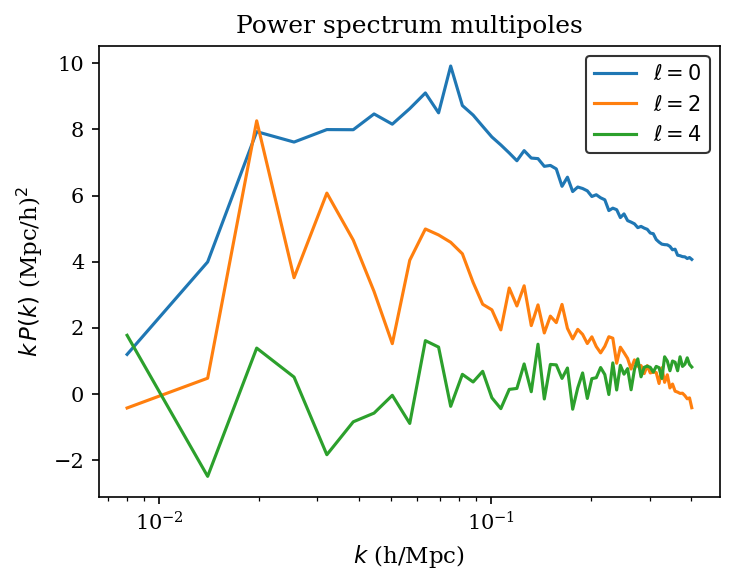

In [14]:
plt.plot(ps['avgk'],ps['avgk']*(ps['P0']-ps['PSN']), label=r'$\ell=0$')
plt.plot(ps['avgk'],ps['avgk']*ps['P2'], label=r'$\ell=2$')
plt.plot(ps['avgk'],ps['avgk']*ps['P4'], label=r'$\ell=4$')


plt.ylabel('$k\,P(k)$ (Mpc/h)$^2$',fontsize=11)
plt.xlabel('$k$ (h/Mpc)',fontsize=11)
plt.xscale('log')

plt.title('Power spectrum multipoles')
plt.legend()
plt.show()

And now the bispectrum. First we compute triangles counts:

In [15]:
counts = ms.triangle_counts()

 ---FORTRAN SUBROUTINE---
 FFT grid =          128
 Allocate all arrays
 Find modes of amplitude |k|
 Save coordinates
 Make FFT plans
 FFT Threads:            4
 Calculate k maps
 Compute counts
  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%| Done


In [16]:
bs = ms.bispectrum(npart,counts,dcl,dcl2,dcl4)

Computing redshift space bispectrum
 ---FORTRAN SUBROUTINE---

 internal grid         128
 number of bins          42
 Allocate all arrays
 Find modes of amplitude |k|
 Save coordinates
 Make FFT plans
 FFT Threads:            4
 Calculate k maps
 Compute maps for delta_2
 Calculate k maps
 Compute maps for delta_4
 Calculate k maps
 Last sum
Progress: |  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%|Done.



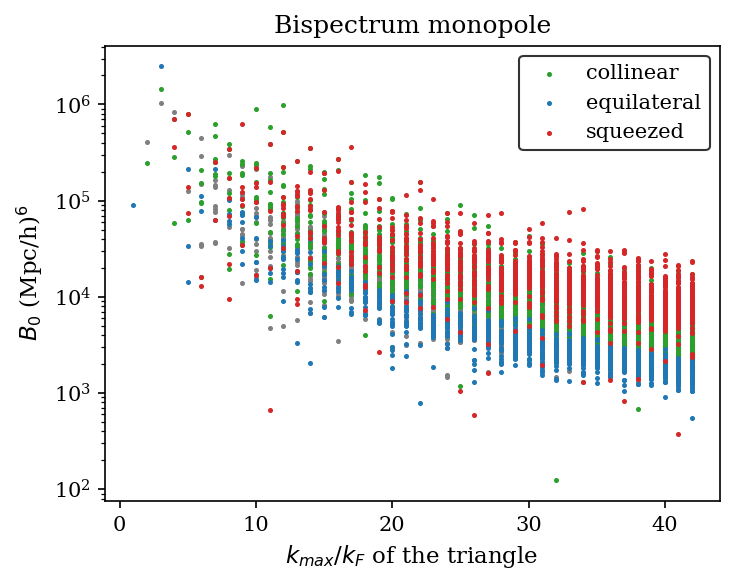

In [18]:
k1,k2,k3 = bs['k1'], bs['k2'], bs['k3']
r2=k2/k1
r3=k3/k1

B0_SN=bs['B0']-bs['BSN'] #Shot noise subtracted B0

plt.scatter(k1[(r3<0.75) & (r3>0.25) & (r2>0.75)],B0_SN[(r3<0.75) & (r3>0.25)& (r2>0.75)],color='C7',s=2)
plt.scatter(k1[r2<=0.75],B0_SN[r2<=0.75],color='C2',label='collinear',s=2)
plt.scatter(k1[r3>=0.75],B0_SN[r3>=0.75],color='C0',label='equilateral',s=2)
plt.scatter(k1[r3<=0.25],B0_SN[r3<=0.25],color='C3',label='squeezed',s=2)


plt.ylabel('$B_0$ (Mpc/h)$^6$',fontsize=11)
plt.xlabel('$k_{max}/k_F$ of the triangle ',fontsize=11)
plt.yscale('log')

plt.title('Bispectrum monopole')
plt.legend()
plt.show()